#Let's plot height anomalies (we have already done this for SSTs!)
This is a jupyter notebook for lab 4. First we will import some libraries and functions. 

In [68]:
import numpy as np
from netCDF4 import MFDataset 
from netCDF4 import Dataset 
import matplotlib
matplotlib.use('Agg')
import matplotlib.pylab as plt
from datetime import datetime
from netCDF4 import num2date
from netCDF4 import date2index
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import metpy.calc as mpcalc
from metpy.units import units
import xarray as xr
import cartopy.util as cutil
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap


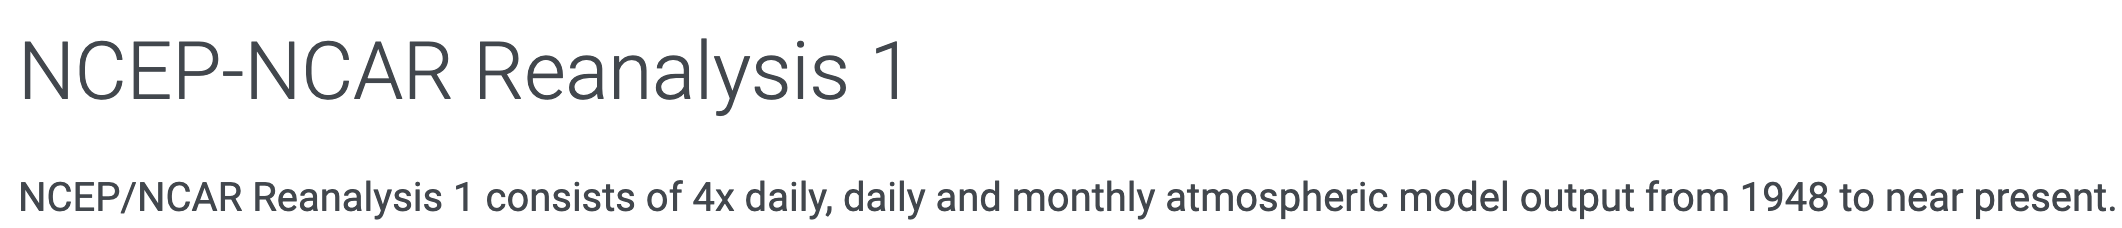
  
  Read in the monthly netCDF files from the PSL THREDDS archive at:
https://psl.noaa.gov/thredds/catalog/Datasets/ncep.reanalysis.derived/pressure/catalog.html

In [5]:
ds  = xr.open_dataset('https://psl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/air.mon.mean.nc')
ds2 = xr.open_dataset('https://psl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/hgt.mon.mean.nc')
ds3 = xr.open_dataset('https://psl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.mean.nc')
ds4 = xr.open_dataset('https://psl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.mean.nc')

Indicate the desired pressure level, year and month!

In [7]:
plevel = 500
year = 2024   
month =  10   
monthlabel = 'October'   

# These lines are needed for the indexing within Python 
# Don't change these!! The year needs to be an integer since 
# it is going to be used as an index for arrays
ty = int(year) - 1948   
tm = int(month)-1

In [31]:
#DRL Diagnostics - note that indices start at 0 so Oct = 9
#Index 0 for year is 1948, (1948+76 = 2024)


From the first file, we extract latitude, longitude and our variables of interest.  

In [33]:
#Dump ds2

DRL Note that this is monthly data so 1948 to the end of 2024 =  77 years
77 years x 12 months = 924. Since the data goes through Oct 2024, we are 2
months short (hence the time: 922 above).

In [61]:
#DRL sanity check, define a list
#alist = 

# Get every other element


In [16]:
# Grab lat/lon values
lats = 
lons = 

#DRL What does the tm::12 do? It is slicing the time index reducing the total # of months
#from 922 to 77. Note that 77 = the number of years in the data set. So the tm::12 -->
#9::12 is selecting every 12th element starting from element 9 (Oct 1948) and then indexing
#by 12 to element 21 (Oct 1949), etc.  We need all of the time series for the climo since
#we are subtracting that, i.e. month - climo month.
                               
temp = 
hght = 

#DRL uwnd and vwnd are extracted differently (as a numpy array) since we need
#to create a wind barb from them(note the MetPy units)

uwnd = 
vwnd = 
u_barbs = 
v_barbs = 

In [39]:
#DRL compare the temp or hght variables with the uwnd or vwnd


In [18]:
hght

<xarray.DataArray 'hgt' (time: 77, lat: 73, lon: 144)>
array([[[5272.2905, 5272.2905, ..., 5272.2905, 5272.2905],
        [5257.8066, 5259.032 , ..., 5255.484 , 5256.6772],
        ...,
        [4978.032 , 4977.613 , ..., 4978.8066, 4978.4194],
        [4971.9355, 4971.9355, ..., 4971.9355, 4971.9355]],

       [[5153.9355, 5153.9355, ..., 5153.9355, 5153.9355],
        [5148.968 , 5148.484 , ..., 5150.0645, 5149.4517],
        ...,
        [4895.129 , 4894.516 , ..., 4896.355 , 4895.7417],
        [4885.2905, 4885.2905, ..., 4885.2905, 4885.2905]],

       ...,

       [[5261.4595, 5261.4595, ..., 5261.4595, 5261.4595],
        [5263.25  , 5263.629 , ..., 5262.339 , 5262.766 ],
        ...,
        [4912.089 , 4912.895 , ..., 4910.411 , 4911.2417],
        [4891.0405, 4891.0405, ..., 4891.0405, 4891.0405]],

       [[5275.0405, 5275.0405, ..., 5275.0405, 5275.0405],
        [5264.9272, 5265.145 , ..., 5264.516 , 5264.7017],
        ...,
        [5002.879 , 5003.2905, ..., 5002.0244, 5002.411 ],
        [4993.5645, 4993.5645, ..., 4993.5645, 4993.5645]]], dtype=float32)
Coordinates:
    level    float32 500.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-10-01 1949-10-01 ... 2024-10-01
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Attributes: (12/13)
    long_name:     Monthly mean geopotential height
    valid_range:   [ -700. 35000.]
    units:         m
    precision:     0
    GRIB_id:       7
    GRIB_name:     HGT
    ...            ...
    level_desc:    Pressure Levels
    statistic:     Mean
    parent_stat:   Other
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [ -354.45834 32321.098  ]
    _ChunkSizes:   [  1   1  73 144]

Looks like there are 77 months

Sanity check! Print the numpy shapes of the geopotential height, latitude and longtitude. This can be important when debugging.

Select the countour settings for the height anomalies (in m) and heights. The format is (minimum, maximum, interval) 

In [25]:
clevs_hght_anom = 
clevs_hght      = 

Make the map!

In [88]:
# # Set up the projection that will be used for plotting
# #mapcrs = ccrs.Robinson(central_longitude=180)
# mapcrs = mapcrs = ccrs.LambertConformal(central_longitude=-100, central_latitude=40)

# # Set up the projection of the data; if lat/lon then PlateCarree is what you want
# datacrs = ccrs.PlateCarree()

# # Start the figure and create plot axes with proper projection
# fig = plt.figure(1, figsize=(14, 12))
# ax  = plt.subplot(111, projection=mapcrs)

# #not needed here, but used for sub-setting domain to plot
# ax.set_extent([-130, -72, 20, 55], ccrs.PlateCarree())

# # Add geopolitical boundaries for map reference
# ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
# ax.add_feature(cfeature.STATES.with_scale('50m'))

# gl = ax.gridlines(color='gray',linewidth=2, alpha = 0.5, linestyle='--')

# #color-fill contour time!
# #DRL note that you can add a '_r' to any python color map to reverse it
# #Plot 500-hPa Geopotential Height Anomaly in meters
#                          #Selected Month  - #All months (77 years)
# cf = ax.contourf(lons, lats, hght[ty,:,:] - np.mean(hght[:,:,:],axis=0), clevs_hght_anom, 
#                  cmap='RdBu_r', transform=datacrs)

# plt.colorbar(cf, orientation='horizontal', pad=0.05, aspect=50)

# # Plot 500-hPa Geopotential Heights in meters
# cs = ax.contour(lons, lats, hght[ty,:,:], clevs_hght, colors='black', transform=datacrs)

# #Format %d is for decimal output (see diagnostic below)
# plt.clabel(cs, fmt='%d',fontsize=14)

# # Plot 500-hPa wind barbs in knots, regrid to reduce number of barbs
# # DRL note that the :: has the same meaning here as in the list application above!
# ax.barbs(lons[::2], lats[::2], u_barbs.to('kt')[ty,::2,::2].m, 
#          v_barbs.to('kt')[ty,::2,::2].m, pivot='middle',
#          color='black', transform=datacrs, length=8, linewidth=0.4)

# # Make some nice titles for the plot (one right, one left)
# plt.title('500 hPa Height Anomaly (m) ' + str(monthlabel) + ' ' +str(year))

# # Reduce excessive white space around image and show
# #plt.savefig('500hPaZAnomaly' + str(monthlabel) + str(year), dpi=150, bbox_inches='tight')
# #plt.show()

In [86]:
# x = 10.5
# print("The value of x is: %d" % x) 

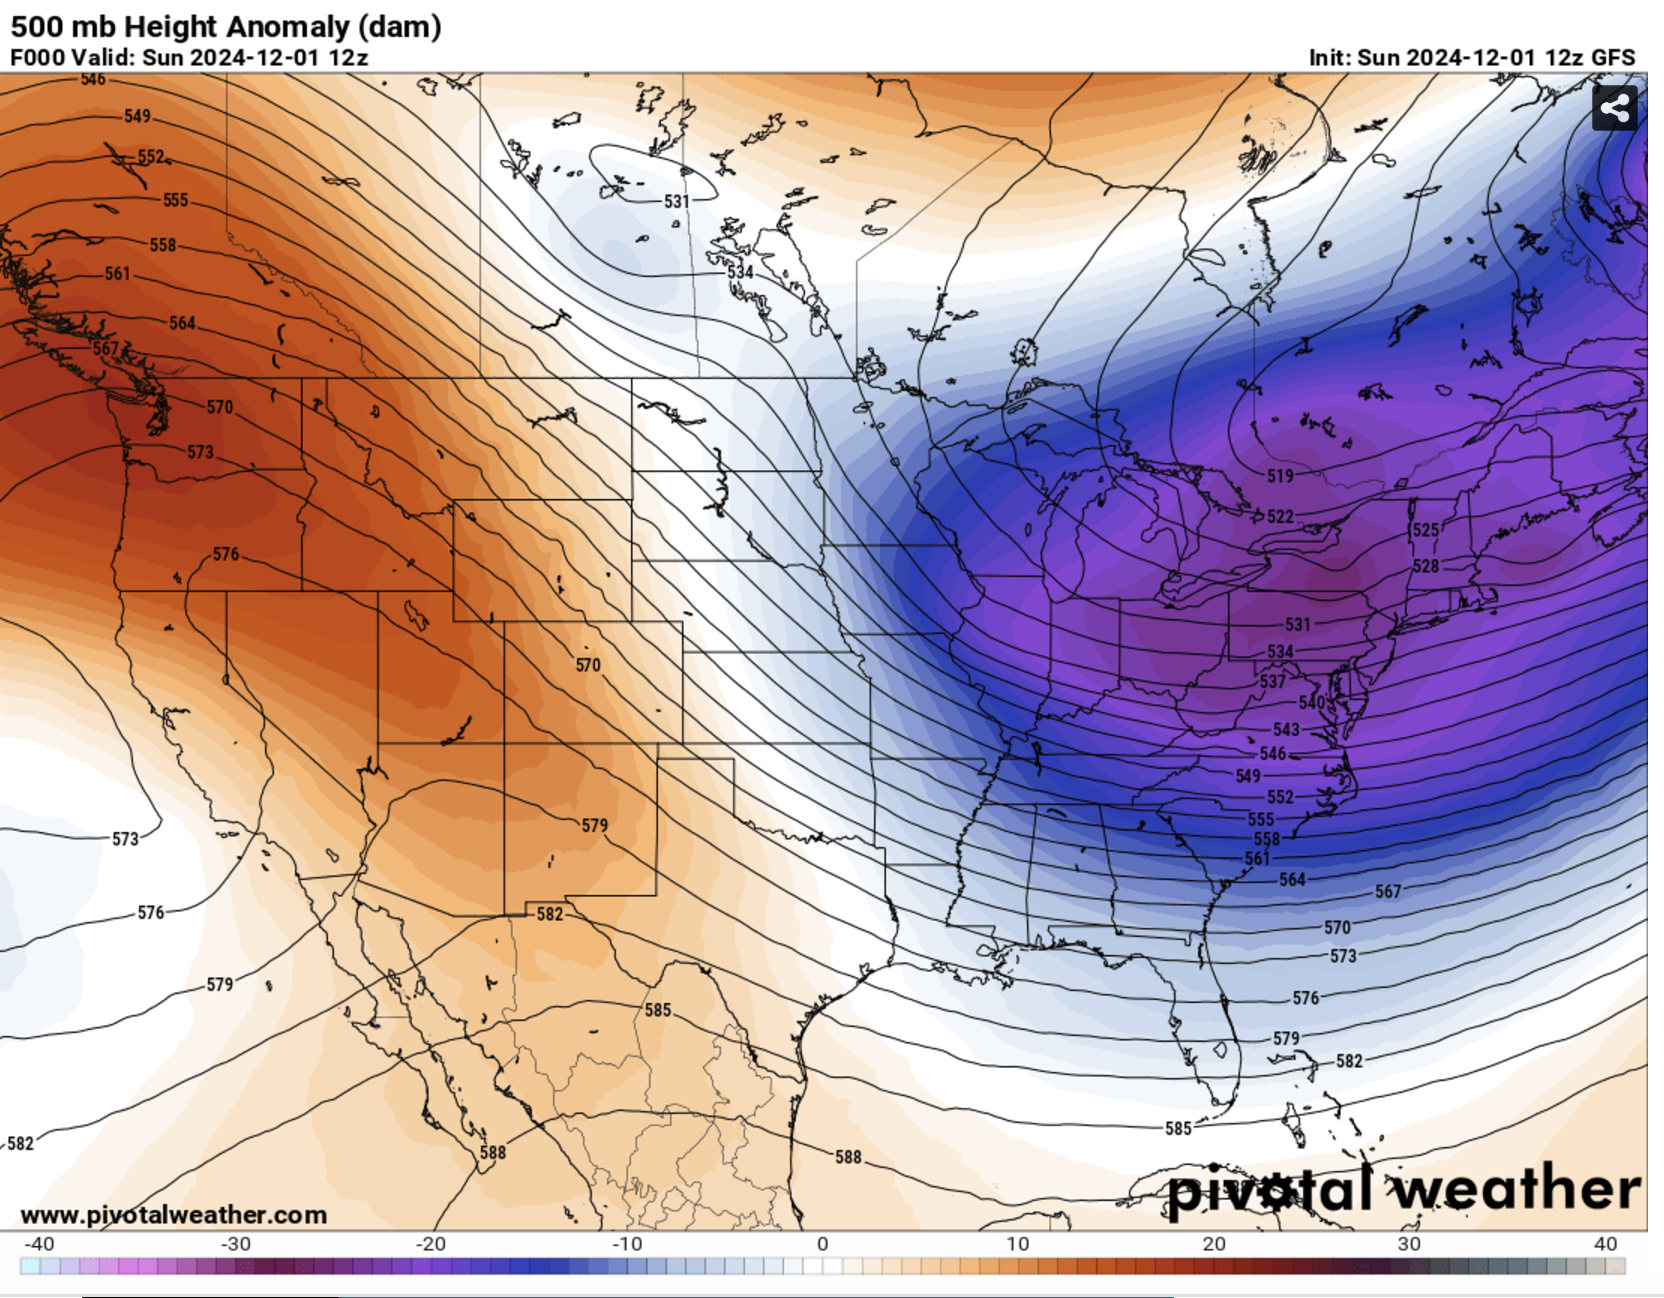

https://www.pivotalweather.com/model.php?p=500h_anom